<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Machine%20Learning%20Course/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Human Activity Recognition with SmartPhones using SVM**

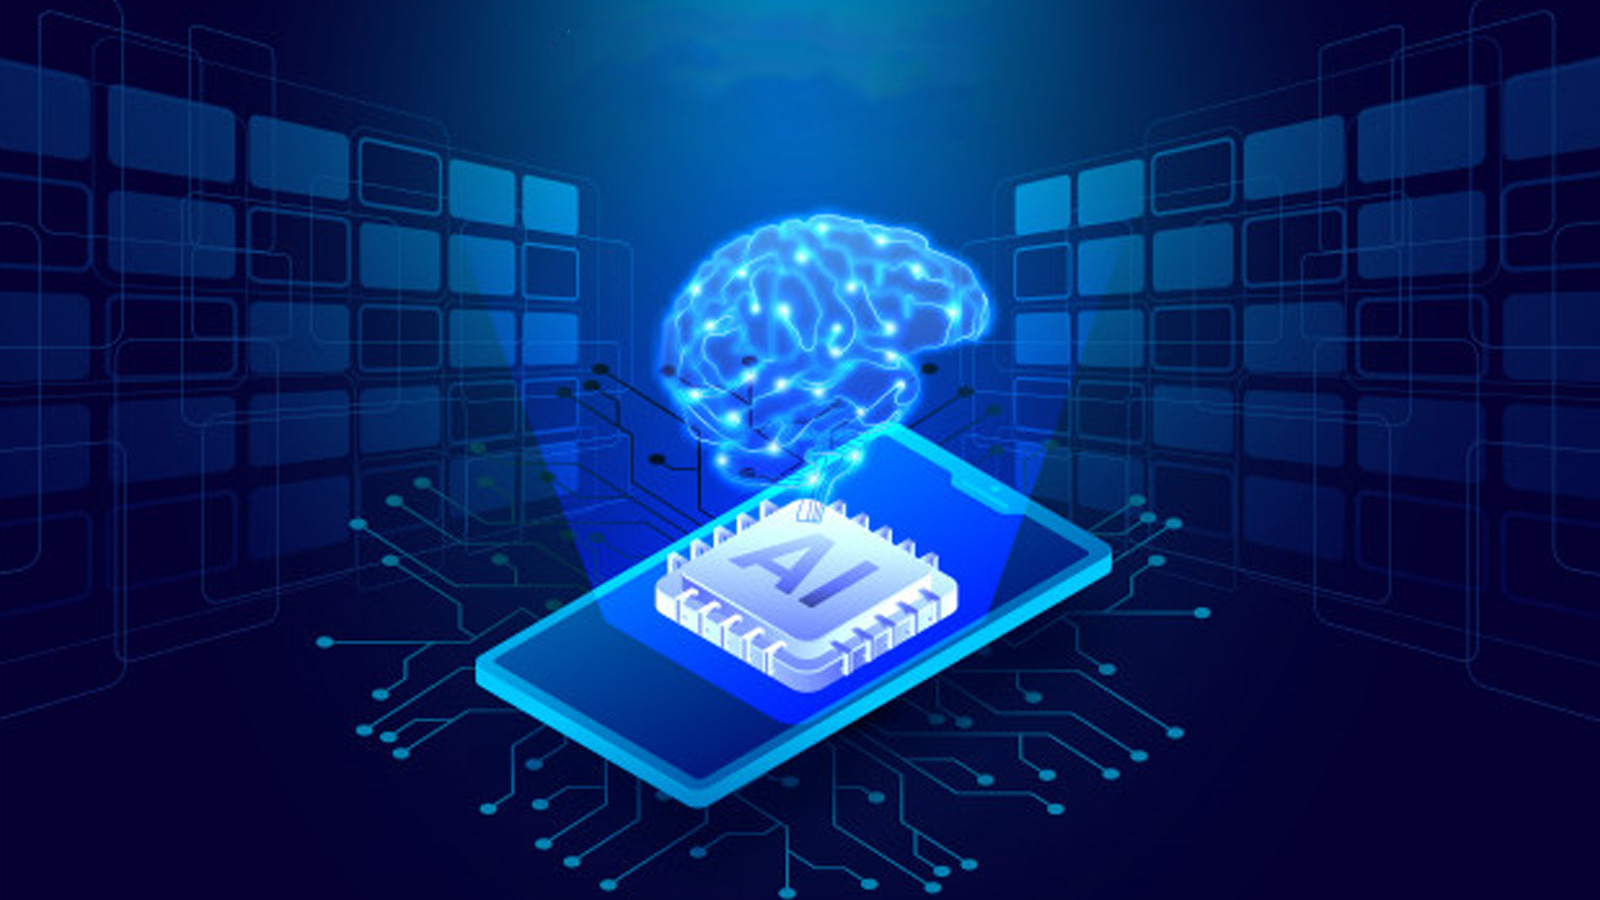

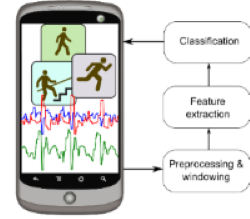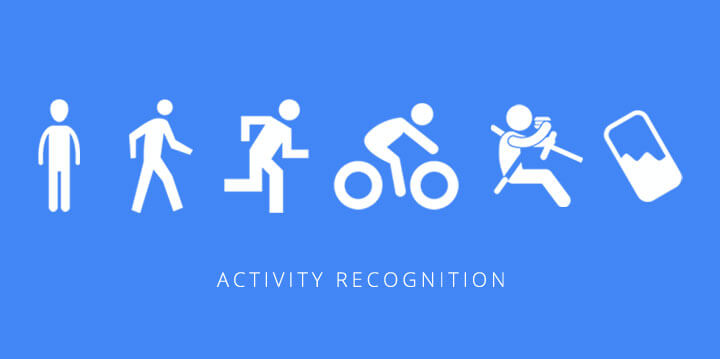

Human activity recognition, or HAR for short, is a broad field of study concerned with identifying the specific movement or action of a person based on sensor data. Movements are often typical activities performed indoors, such as walking, talking, standing, and sitting.

Human Activity Recognition(HAR) is classifying activity of a person using responsive sensors that are affected from human movement. Both users and capabilities(sensors) of smartphones increase and users usually carry their smartphone with them. 

Activity recognition is used in many applications such as surveillance, medical equipments, anti-terrorists, and anti-crime securities as well as life logging and assistance. Environment-based sensors are used to detect the users' interaction with the environment and interaction with objects that are also equipped with sensors.

As this is One of the Advanced Machine Learning Project, We will be using Support Vector Machine to build robust Activity Recognition System based on Smartphones. 

It is a challenging research problem and large volume of sensor data is collected (e.g. tens or hundreds of observations per second) so a different Test data file will be used in this Project for evaluation purpose. Download the dataset from here:
- Train Data: https://drive.google.com/uc?export=download&id=1bicn3x15H6tcNnqt4YJ2fQXW_vkOXFnP
- Test Data: https://drive.google.com/uc?export=download&id=1gGBkOhGhtF9lhCRgDpvirUO7TSvPYBvj

You can take overview of this Problem statement from here: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones

In [ ]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
# import train and test dataset and shuffle the samples
train_url = "https://drive.google.com/uc?export=download&id=1bicn3x15H6tcNnqt4YJ2fQXW_vkOXFnP"
test_url = "https://drive.google.com/uc?export=download&id=1gGBkOhGhtF9lhCRgDpvirUO7TSvPYBvj"

from sklearn.utils import shuffle
train = shuffle(pd.read_csv(train_url))
test = shuffle(pd.read_csv(test_url))
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7078,0.257987,-0.001003,-0.111069,-0.389347,-0.238018,-0.230678,-0.450295,-0.256048,-0.252216,-0.199483,...,-0.497739,0.387553,-0.526945,-0.444913,0.318596,-0.839037,0.206435,0.044508,30,WALKING
3476,0.276051,-0.013733,-0.095749,-0.998922,-0.994032,-0.988395,-0.999198,-0.994285,-0.990801,-0.944800,...,-0.927808,0.022586,-0.101890,0.208852,0.570727,-0.897975,0.023863,0.015469,17,SITTING
4991,0.273101,-0.035169,-0.099076,-0.270158,-0.002946,0.215978,-0.280191,-0.131137,0.239877,-0.153642,...,-0.423682,0.015427,0.906989,0.737847,-0.341551,-0.783227,0.190669,0.140490,23,WALKING
4444,0.275496,-0.019049,-0.107348,-0.994705,-0.993737,-0.988754,-0.995236,-0.993159,-0.989478,-0.941662,...,-0.975120,0.268363,-0.872327,0.139644,-0.024825,0.536828,-0.411559,-0.596892,22,LAYING
2382,0.218024,-0.056350,-0.174467,-0.916834,-0.874916,-0.829730,-0.925624,-0.882565,-0.823373,-0.819664,...,-0.757763,-0.013131,-0.570095,0.401218,0.315451,-0.571879,0.255394,0.274459,14,STANDING


In [ ]:
# Check for missing values in the dataset
print("missing values in train set:",train.isnull().values.any())
print("missing values in test set:",test.isnull().values.any())

missing values in train set: False
missing values in test set: False


### Visualizing Target variable Distribution

In [ ]:
# Frequency distribution of target categories
train["Activity"].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

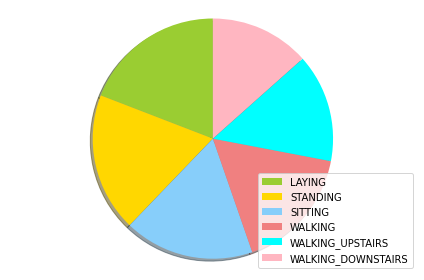

In [ ]:
# plot pie chart for target variable
labels = train.Activity.value_counts().keys()
sizes = train.Activity.value_counts().tolist()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()
# or you can just do this>> pie.plot(kind='pie',labels='labels',values='values', title='Activity Ditribution',subplots= "True") 

### Normalize the Predictor(Feature Set) for SVM training

In [ ]:
# Seperating Predictors(drop column "subject") and target values from train and test sets
X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
Y_train_label = train.Activity
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
Y_test_label = test.Activity
# check Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape)

Dimension of Train set (7352, 561)
Dimension of Test set (2947, 561)


In [ ]:
# Transforming categorical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
Y_train = encoder.fit_transform(Y_train_label)
# encoding test labels 
Y_test = encoder.fit_transform(Y_test_label)

In [ ]:
# Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
names_of_predictors = list(X_train.columns.values)
print("Number of Predictors:",len(names_of_predictors))
# All the columns in our dataset are numerical columns

Number of numeric features: 561
Number of Predictors: 561


### Feature Scaling
Scaling for train and test data can't be done separately, so best practice is to use only the training set to figure out how to scale / normalize, then blindly apply the same transform to the test set. The test set must use identical scaling to the training set because if we scale the training and test sets using different scalars, then we'll not get correct predictions as different mean and variance over predictors was used for training set to train the model, while different mean and variance over predictors is used for test predictions.

**In sklean:** 

1.Fit(): Method calculates the parameters μ and σ and saves them as internal objects.

2.Transform(): Method using these calculated parameters apply the transformation to a particular dataset.

3.Fit_transform(): joins the fit() and transform() method for transformation of dataset.

In [ ]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

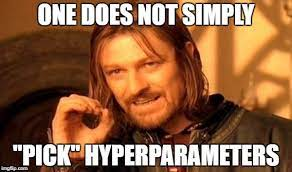

### Hyperparameter tuning using grid search and cross validation
## Grid Search CV
GridSearchCV is a useful tool to fine tune the parameters of your model. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. In cross-validation, the process divides the train data further into two parts – the train data and the validation data.

The most popular type of Cross-validation is K-fold Cross-Validation. It is an iterative process that divides the train data into k partitions. Each iteration keeps one partition for testing and the remaining k-1 partitions for training the model. The next iteration will set the next partition as test data and the remaining k-1 as train data and so on. In each iteration, it will record the performance of the model and at the end give the average of all the performance. Thus, it is also a time-consuming process.

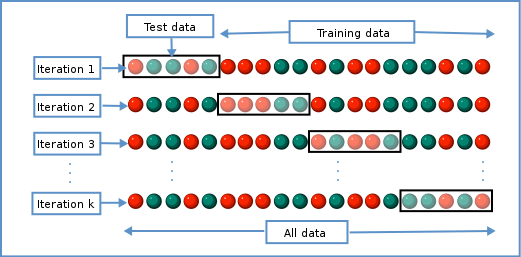
<center> K-Fold Cross Validation (Image by Gufosowa from WikiMedia) </center>

Thus, GridSearch along with cross-validation takes huge time cumulatively to evaluate the best hyperparameters. Now we will see how to use GridSearchCV in our Machine Learning project.

In [ ]:
# Create the parameter grid  
params_grid = [{'kernel': ['rbf','linear'], 
                'gamma': [1e-3, 1e-4],
                'C': [1, 10, 100, 1000]}]

C and Gamma are the parameters for a nonlinear support vector machine (SVM) with a Gaussian radial basis function kernel. C is a hypermeter which is set before the training model and used to control error and Gamma is also a hypermeter which is set before the training model and used to give curvature weight of the decision boundary. we use C and Gammas as grid search. 

### Training SVM model

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)  # cv is number of cross-validations you want to try
svm_model.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf', 'linear']}])

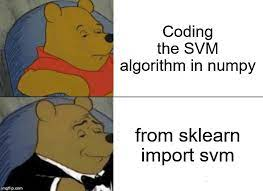

## SVM - Evaluation

### Confusion Matrix and Accuracy Score

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

Best score for training data: 0.9865341269070511 

Best C: 100 

Best Kernel: rbf 

Best Gamma: 0.001 



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
# Show Classification report
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))
print(classification_report(Y_test_label,Y_pred_label))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.98      0.97       496
WALKING_DOWNSTAIRS       0.98      0.93      0.95       420
  WALKING_UPSTAIRS       0.93      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



[[537   0   0   0   0   0]
 [  3 440  47   0   0   1]
 [  0  13 519   0   0   0]
 [  0   0   0 486   4   6]
 [  0   0   0   6 389  25]
 [  0   0   0  15   2 454]]


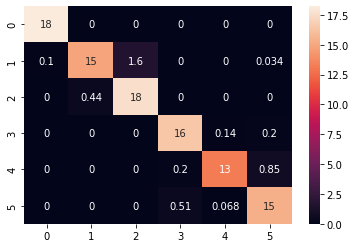

In [ ]:
# Make the Confusion Matrix
cf_matrix = confusion_matrix(Y_test_label,Y_pred_label)
print(cf_matrix)
# You can also display confusion matrix in percenatage 
cf_matrix = 100*cf_matrix/np.sum(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
# print the training and testing accuracy(in %) for your final model
print("Training accuracy for SVM: ", final_model.score(X_train_scaled , Y_train)*100,"%")
print("Testing  accuracy for SVM: ", final_model.score(X_test_scaled  , Y_test )*100,"%")

Training accuracy for SVM:  100.0 %
Testing  accuracy for SVM:  95.86019681031559 %


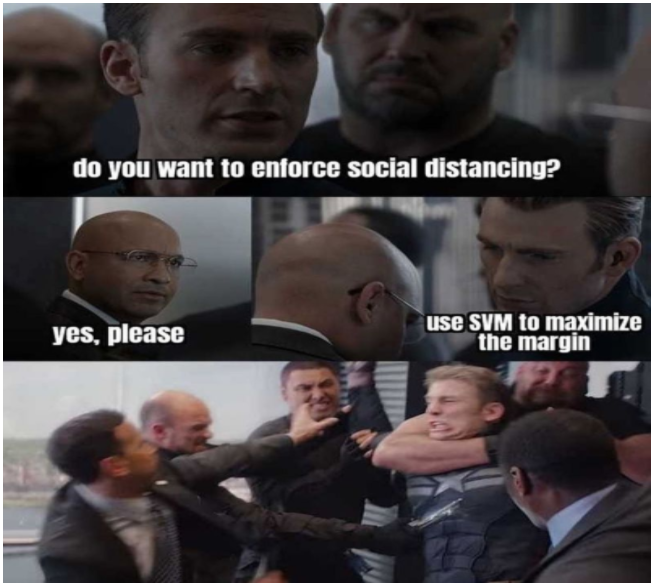

**CONGRATULATIONS! YOU'VE SUCCESSFULLY BUILT HUMAN ACTIVITY RECOGNITION(HAR) SYSTEM WHICH SERVES MANY APPLICATIONS TODAY**